In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("test_data.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city_name           5000 non-null   object 
 1   magnitude_of_delay  5000 non-null   object 
 2   delay_in_seconds    5000 non-null   int64  
 3   affected_roads      4915 non-null   object 
 4   record_date         5000 non-null   object 
 5   luminosity          5000 non-null   object 
 6   avg_temperature     5000 non-null   float64
 7   avg_atm_pressure    5000 non-null   float64
 8   avg_humidity        5000 non-null   float64
 9   avg_wind_speed      5000 non-null   float64
 10  avg_precipitation   5000 non-null   float64
 11  avg_rain            5000 non-null   object 
 12  incidents           5000 non-null   object 
dtypes: float64(5), int64(1), object(7)
memory usage: 507.9+ KB


In [4]:
data.describe()

,delay_in_seconds,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0
mean,560.567000,14.583000,1018.145000,74.455000,1.253500,0.0
std,1686.859581,4.820514,5.174372,17.204638,1.269847,0.0
min,0.000000,1.000000,997.000000,6.000000,0.000000,0.0
25%,0.000000,11.000000,1015.000000,63.000000,0.000000,0.0
50%,0.000000,14.000000,1019.000000,78.000000,1.000000,0.0
75%,234.000000,18.000000,1022.000000,90.000000,2.000000,0.0
max,31083.000000,35.000000,1032.000000,100.000000,10.000000,0.0


Como as colunas city_name e avg_precipitation possuem apenas 1 valor, podemos retirá-las, já que não vão ter nenhuma influência na previsão

In [5]:
data.nunique()



data2 = data.drop(['city_name', 'avg_precipitation'], axis=1)
test_data2 = test_data.drop(['city_name', 'avg_precipitation'], axis=1)

In [6]:
data.head(30)

,city_name,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_precipitation,avg_rain,incidents
0,Guimaraes,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,0.0,Sem Chuva,None
1,Guimaraes,UNDEFINED,385,"N101,",2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,0.0,Sem Chuva,None
2,Guimaraes,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,0.0,Sem Chuva,Low
3,Guimaraes,MAJOR,2297,"N101,R206,N105,N101,N101,N101,N101,N101,N101,N...",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,0.0,Sem Chuva,Very_High
4,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,0.0,Sem Chuva,High
5,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,N101,N101,N101",2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,0.0,Sem Chuva,Medium
6,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101",2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,0.0,Sem Chuva,Low
7,Guimaraes,UNDEFINED,0,"N101,N101,N101,N101,N101,",2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,0.0,Sem Chuva,High
8,Guimaraes,UNDEFINED,1368,"N101,N101,N101,N101,N101,N101,N101,N101,N101,",2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,0.0,Sem Chuva,Very_High
9,Guimaraes,MAJOR,10431,"N101,N101,N206,N105,N309,N309,N101,N101,IC5,N1...",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,0.0,Sem Chuva,Very_High


In [7]:
data2.isnull().sum()

magnitude_of_delay     0
delay_in_seconds       0
affected_roads        85
record_date            0
luminosity             0
avg_temperature        0
avg_atm_pressure       0
avg_humidity           0
avg_wind_speed         0
avg_rain               0
incidents              0
dtype: int64

<AxesSubplot:>

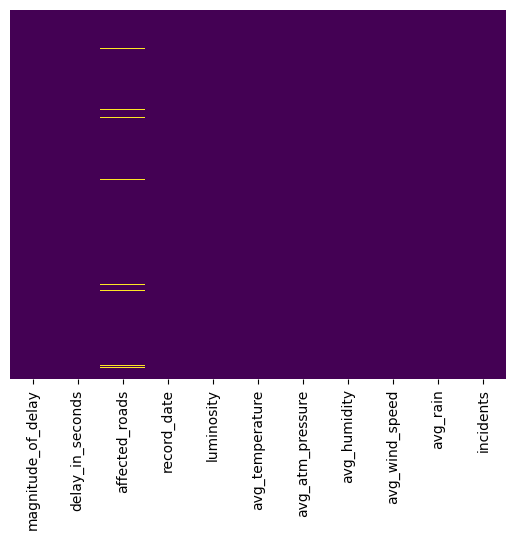

In [8]:
sns.heatmap(data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:>

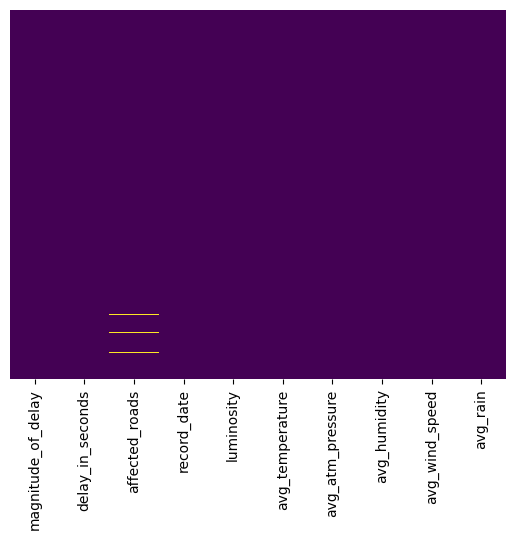

In [9]:
sns.heatmap(test_data2.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [10]:
i = 0
data_roads = data2.copy()

#print(data2['affected_roads']).head(30)
all_roads = {}
for road_list in data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads and road != "":
                    all_roads[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            data_roads.at[i, 'affected_roads'] = list(dic.keys())
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads))
print("Estradas :: ", list(all_roads.keys()))


i = 0

test_data_roads = test_data2.copy()

#print(data2['affected_roads']).head(30)
all_roads_test = {}
for road_list in test_data_roads['affected_roads']:
    if type(road_list) == type(float(i)):
        #print("Iteração ::", i)
        test_data_roads.at[i, 'affected_roads'] = ","
    else: 
        road_list = str(road_list)
        if road_list != ",":
            roads = road_list.split(",")
            #print(roads)
            dic = {}
            
            for road in roads:
                #print(road)
                if road not in dic and road != "":
                    #print(road)
                    dic[road] = 0
                if road not in all_roads_test and road != "":
                    all_roads_test[road] = 0
            #data2['affected_roads'][i] = str(list(dic.keys()))
            test_data_roads.at[i, 'affected_roads'] = list(dic.keys())
            #print(list(dic.keys()))
    i = i + 1
print("Nº de estradas :: ", len(all_roads_test))
print("Estradas :: ", list(all_roads_test.keys()))



Nº de estradas ::  10
Estradas ::  ['N101', 'R206', 'N105', 'N206', 'N309', 'IC5', 'N310', 'N207-4', 'IC5 - N206', 'EM579']
Nº de estradas ::  10
Estradas ::  ['N101', 'R206', 'N105', 'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4']


In [11]:
data_roads.head(30)

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,None
1,UNDEFINED,385,[N101],2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,None
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,Low
3,MAJOR,2297,"[N101, R206, N105]",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,Very_High
4,UNDEFINED,0,[N101],2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,High
5,UNDEFINED,0,[N101],2021-12-07 23:00,DARK,9.0,1015.0,94.0,0.0,Sem Chuva,Medium
6,UNDEFINED,0,[N101],2021-12-05 05:00,DARK,8.0,1026.0,87.0,1.0,Sem Chuva,Low
7,UNDEFINED,0,[N101],2021-04-14 23:00,DARK,16.0,1012.0,71.0,2.0,Sem Chuva,High
8,UNDEFINED,1368,[N101],2021-05-01 12:00,LIGHT,14.0,1017.0,67.0,5.0,Sem Chuva,Very_High
9,MAJOR,10431,"[N101, N206, N105, N309, IC5]",2021-10-11 18:00,LIGHT,23.0,1018.0,40.0,0.0,Sem Chuva,Very_High


In [12]:
for road in all_roads:
    data_roads[road] = 0

for road in all_roads_test:
    test_data_roads[road] = 0
#data2.head(30)

In [13]:
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,N105,N309,IC5,N206,EM579,N310,N101 - N310,N207-4
0,UNDEFINED,1211,[N101],2021-04-13 19:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,0,[N101],2021-10-13 04:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
2,UNDEFINED,0,[N101],2021-07-18 19:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
3,UNDEFINED,140,"[N101, R206]",2021-10-30 15:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0
4,UNDEFINED,0,[N101],2021-10-18 10:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,0,0,0,0,0,0,0,0,0,0


In [14]:
i = 0
for reg in data_roads:
    list = data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            data_roads.at[i, road] = 1
    i = i + 1


i = 0
for reg in test_data_roads:
    list = test_data_roads.at[i, 'affected_roads']
    for road in list:
        if road != ",":
            test_data_roads.at[i, road] = 1
    i = i + 1

In [15]:
print(test_data_roads.columns)

Index(['magnitude_of_delay', 'delay_in_seconds', 'affected_roads',
       'record_date', 'luminosity', 'avg_temperature', 'avg_atm_pressure',
       'avg_humidity', 'avg_wind_speed', 'avg_rain', 'N101', 'R206', 'N105',
       'N309', 'IC5', 'N206', 'EM579', 'N310', 'N101 - N310', 'N207-4'],
      dtype='object')


<AxesSubplot:>

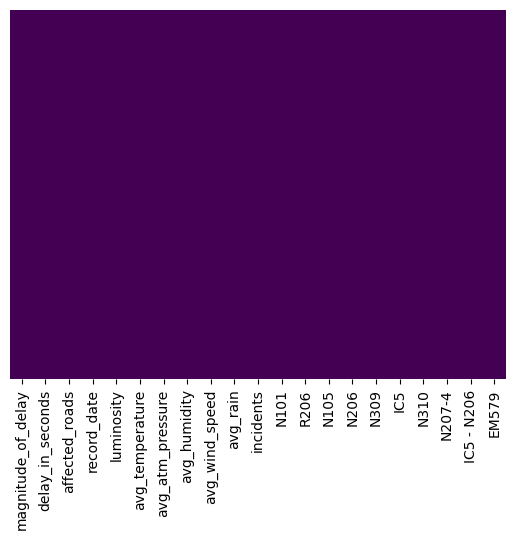

In [16]:
data3 = data_roads.dropna()
sns.heatmap(data_roads.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Como os valores dos incidentes, a nossa label, são categóricos, estes não poderão ser submetidos à maioria dos modelos de ML disponíveis. Assim, teremos de convertê-los para valores numéricos

In [17]:
replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

data4 = data3.replace(replace_map)
data4.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N101,R206,N105,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579
0,UNDEFINED,0,",",2021-03-15 23:00,DARK,12.0,1013.0,70.0,1.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
1,UNDEFINED,385,[N101],2021-12-25 18:00,DARK,12.0,1007.0,91.0,1.0,Sem Chuva,...,1,0,0,0,0,0,0,0,0,0
2,UNDEFINED,69,",",2021-03-12 15:00,LIGHT,14.0,1025.0,64.0,0.0,Sem Chuva,...,0,0,0,0,0,0,0,0,0,0
3,MAJOR,2297,"[N101, R206, N105]",2021-09-29 09:00,LIGHT,15.0,1028.0,75.0,1.0,Sem Chuva,...,1,1,1,0,0,0,0,0,0,0
4,UNDEFINED,0,[N101],2021-06-13 11:00,LIGHT,27.0,1020.0,52.0,1.0,Sem Chuva,...,1,0,0,0,0,0,0,0,0,0


Como podemos ver, agora o tipo do feature Incidents é numérico

In [18]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   magnitude_of_delay  5000 non-null   object 
 1   delay_in_seconds    5000 non-null   int64  
 2   affected_roads      5000 non-null   object 
 3   record_date         5000 non-null   object 
 4   luminosity          5000 non-null   object 
 5   avg_temperature     5000 non-null   float64
 6   avg_atm_pressure    5000 non-null   float64
 7   avg_humidity        5000 non-null   float64
 8   avg_wind_speed      5000 non-null   float64
 9   avg_rain            5000 non-null   object 
 10  incidents           5000 non-null   int64  
 11  N101                5000 non-null   int64  
 12  R206                5000 non-null   int64  
 13  N105                5000 non-null   int64  
 14  N206                5000 non-null   int64  
 15  N309                5000 non-null   int64  
 16  IC5   

Agora vamos tratar das datas

In [19]:
data4['record_date'].head()

0    2021-03-15 23:00
1    2021-12-25 18:00
2    2021-03-12 15:00
3    2021-09-29 09:00
4    2021-06-13 11:00
Name: record_date, dtype: object

In [20]:
data4['record_date'] = pd.to_datetime(data4['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')
assert data4['record_date'].isnull().sum() == 0, 'missing record date'
data4['record_date'].head()

test_data_roads['record_date'] = pd.to_datetime(test_data_roads['record_date'], format = "%Y-%m-%d %H:%M", errors='coerce')

In [21]:
data4['record_date_year'] = data4['record_date'].dt.year
data4['record_date_month'] = data4['record_date'].dt.month
data4['record_date_day'] = data4['record_date'].dt.day
data4['record_date_hour'] = data4['record_date'].dt.hour
data4['record_date_minute'] = data4['record_date'].dt.minute

test_data_roads['record_date_year'] = test_data_roads['record_date'].dt.year
test_data_roads['record_date_month'] = test_data_roads['record_date'].dt.month
test_data_roads['record_date_day'] = test_data_roads['record_date'].dt.day
test_data_roads['record_date_hour'] = test_data_roads['record_date'].dt.hour
test_data_roads['record_date_minute'] = test_data_roads['record_date'].dt.minute


data4.head()
test_data_roads.head()

,magnitude_of_delay,delay_in_seconds,affected_roads,record_date,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,...,N206,EM579,N310,N101 - N310,N207-4,record_date_year,record_date_month,record_date_day,record_date_hour,record_date_minute
0,UNDEFINED,1211,[N101],2021-04-13 19:00:00,LIGHT,15.0,1018.0,80.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,4,13,19,0
1,UNDEFINED,0,[N101],2021-10-13 04:00:00,DARK,16.0,1018.0,41.0,2.0,Sem Chuva,...,0,0,0,0,0,2021,10,13,4,0
2,UNDEFINED,0,[N101],2021-07-18 19:00:00,LIGHT,22.0,1017.0,71.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,7,18,19,0
3,UNDEFINED,140,"[N101, R206]",2021-10-30 15:00:00,LIGHT,18.0,1008.0,81.0,3.0,Sem Chuva,...,0,0,0,0,0,2021,10,30,15,0
4,UNDEFINED,0,[N101],2021-10-18 10:00:00,LIGHT,20.0,1022.0,86.0,0.0,Sem Chuva,...,0,0,0,0,0,2021,10,18,10,0


Aqui podemos verificar que o ano dos incidentes, bem como o minuto, são features com um único valor, sendo então essa informação inútil.

In [22]:
data5 = data4.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
test_data3 = test_data_roads.drop(['record_date_minute','record_date_year', 'record_date', 'affected_roads'], axis = 1)
print(data5['magnitude_of_delay'].unique())
print(data5['luminosity'].unique())
print(data5['avg_rain'].unique())
#data5.info()

['UNDEFINED' 'MAJOR' 'MODERATE']
['DARK' 'LIGHT' 'LOW_LIGHT']
['Sem Chuva' 'chuva moderada' 'chuva fraca' 'chuva forte']


A 'magnitude_of_delay' tem 3 valores possíveis: UNDEFINED, MAJOR e MODERATE <br>
A luminosidade tem 3 valores possíveis: LIGHT, LOW_LIGHT, DARK <br>
A 'avg_rain' tem 4 valores possíveis: Sem Chuva, chuva moderada, chuva fraca, chuva forte <br>
Assim, teremos de transformar estes valores em valores numéricos, fazendo label enconding


In [23]:
replace_map = { 'magnitude_of_delay' : {'UNDEFINED': 0, 'MODERATE': 1, 'MAJOR': 2}, 
                'luminosity': {'DARK': 0, 'LIGHT': 1, 'LOW_LIGHT': 2},
                'avg_rain': {'Sem Chuva': 0, 'chuva moderada': 1, 'chuva fraca': 2, 'chuva forte': 3}
              }
data6 = data5.replace(replace_map)
test_data4 = test_data3.replace(replace_map)

data6.head()
#test_data4.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,incidents,N101,...,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,record_date_month,record_date_day,record_date_hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,0,...,0,0,0,0,0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,0,1,...,0,0,0,0,0,0,0,12,25,18
2,0,69,1,14.0,1025.0,64.0,0.0,0,1,0,...,0,0,0,0,0,0,0,3,12,15
3,2,2297,1,15.0,1028.0,75.0,1.0,0,4,1,...,0,0,0,0,0,0,0,9,29,9
4,0,0,1,27.0,1020.0,52.0,1.0,0,3,1,...,0,0,0,0,0,0,0,6,13,11


Depois de feita toda a etapa de feature engineering, vamos agora construir um modelo de RNA.

In [24]:
df = data6
df_test = test_data4

X = df.drop('incidents', axis=1)
y = df[['incidents']]
X_test = df_test
X.head()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,...,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,record_date_month,record_date_day,record_date_hour
0,0,0,0,12.0,1013.0,70.0,1.0,0,0,0,...,0,0,0,0,0,0,0,3,15,23
1,0,385,0,12.0,1007.0,91.0,1.0,0,1,0,...,0,0,0,0,0,0,0,12,25,18
2,0,69,1,14.0,1025.0,64.0,0.0,0,0,0,...,0,0,0,0,0,0,0,3,12,15
3,2,2297,1,15.0,1028.0,75.0,1.0,0,1,1,...,0,0,0,0,0,0,0,9,29,9
4,0,0,1,27.0,1020.0,52.0,1.0,0,1,0,...,0,0,0,0,0,0,0,6,13,11


Modelo de RNA

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.preprocessing import MinMaxScaler

RANDOM_SEED = 2021

2022-11-20 21:11:57.998187: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-20 21:11:58.161480: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-20 21:11:58.161496: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-20 21:11:58.789365: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [26]:
scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
#scaler_Y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
#y_scaled = pd.DataFrame(scaler_Y.transform(y[y.columns]), columns=y.columns)

#scaler_test_X = MinMaxScaler(feature_range=(0,1)).fit(X_test)
#X_scaled_test = pd.DataFrame(scaler_test_X.transform(X_test[X_test.columns]), columns=X_test.columns)


In [27]:
X_scaled.describe()

,magnitude_of_delay,delay_in_seconds,luminosity,avg_temperature,avg_atm_pressure,avg_humidity,avg_wind_speed,avg_rain,N101,R206,...,N206,N309,IC5,N310,N207-4,IC5 - N206,EM579,record_date_month,record_date_day,record_date_hour
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.0,5000.0,5000.0,5000.0,5000.000000,5000.000000,5000.000000
mean,0.136400,0.018035,0.269700,0.399500,0.604143,0.728245,0.125350,0.030933,0.003200,0.000200,...,0.000200,0.000200,0.000200,0.0,0.0,0.0,0.0,0.557418,0.496280,0.495861
std,0.342664,0.054270,0.284127,0.141780,0.147839,0.183028,0.126985,0.138814,0.056484,0.014142,...,0.014142,0.014142,0.014142,0.0,0.0,0.0,0.0,0.312921,0.291158,0.300452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.294118,0.514286,0.606383,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.272727,0.233333,0.217391
50%,0.000000,0.000000,0.500000,0.382353,0.628571,0.765957,0.100000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.545455,0.500000,0.478261
75%,0.000000,0.007528,0.500000,0.500000,0.714286,0.893617,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.818182,0.733333,0.739130
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000


In [51]:
'''X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y_scaled, test_size=0.2,
                                                    random_state=RANDOM_SEED)
'''
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.8,
                                                    random_state=RANDOM_SEED)

In [76]:
import os 
os.environ['CUDA_VISIBLE_DEVICES'] = ""
def build_model(activation='relu', learning_rate=1e-3):
    #Create a sequential model (with three layers - last one is the output)
    model = Sequential()
    model.add(Dense(32, input_dim=21, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dense(16, activation=activation))
    model.add(Dropout(rate=0.5))
    model.add(Dense(5))
    
    #Compile the model
    #Define the loss function, the otimizer and metrics to be used
    model.compile(
        loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy'])
    return model

In [77]:
model = build_model(learning_rate=1e-3)
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 32)                704       
                                                                 
 dense_51 (Dense)            (None, 16)                528       
                                                                 
 dense_52 (Dense)            (None, 16)                272       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_53 (Dense)            (None, 5)                 85        
                                                                 
Total params: 1,589
Trainable params: 1,589
Non-trainable params: 0
_________________________________________________________________


In [46]:
TUNING_DICT = {
    'activation' : ['relu', 'tanh'],
    'learning_rate' : [0.01, 0.001,0.0001]
}

In [44]:
kf = KFold(n_splits=5,shuffle=True,random_state=RANDOM_SEED)

model = KerasRegressor(build_fn=build_model,epochs=50,batch_size=32)

grid_search = GridSearchCV(estimator = model,
                           param_grid=TUNING_DICT,
                           cv=kf,
                           scoring='accuracy',
                           refit='True',
                           verbose=1)

grid_search.fit(X_train,Y_train,validation_split=0.2)




Fitting 5 folds for each of 6 candidates, totalling 30 fits
Epoch 1/50


/tmp/ipykernel_26052/2258558986.py:3: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=build_model,epochs=50,batch_size=32)


80/80 [==============================] - 1s 3ms/step - loss: 0.3760 - accuracy: 0.4402 - val_loss: 0.2181 - val_accuracy: 0.4469
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2267 - accuracy: 0.4715 - val_loss: 0.2012 - val_accuracy: 0.4578
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2050 - accuracy: 0.4742 - val_loss: 0.1928 - val_accuracy: 0.4656
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1910 - accuracy: 0.4742 - val_loss: 0.1837 - val_accuracy: 0.4547
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1801 - accuracy: 0.4828 - val_loss: 0.1789 - val_accuracy: 0.4719
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1561 - accuracy: 0.4883 - val_loss: 0.1493 - val_accuracy: 0.4703
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1445 - accuracy: 0.4934 - val_loss: 0.1660 - val_accuracy: 0.4484
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.4241 - accuracy: 0.4238 - val_loss: 0.2523 - val_accuracy: 0.3938
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2451 - accuracy: 0.4688 - val_loss: 0.2224 - val_accuracy: 0.4359
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2156 - accuracy: 0.4766 - val_loss: 0.2015 - val_accuracy: 0.4344
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1949 - accuracy: 0.4762 - val_loss: 0.1915 - val_accuracy: 0.4406
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1744 - accuracy: 0.4852 - val_loss: 0.1849 - val_accuracy: 0.4547
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1537 - accuracy: 0.4922 - val_loss: 0.1569 - val_accuracy: 0.4547
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1403 - accuracy: 0.4969 - val_loss: 0.1437 - val_accuracy: 0.4547
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.4337 - accuracy: 0.4293 - val_loss: 0.2166 - val_accuracy: 0.4313
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2295 - accuracy: 0.4723 - val_loss: 0.2200 - val_accuracy: 0.4359
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.4719 - val_loss: 0.1898 - val_accuracy: 0.4234
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.4781 - val_loss: 0.1903 - val_accuracy: 0.4172
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1758 - accuracy: 0.4859 - val_loss: 0.1625 - val_accuracy: 0.4281
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1607 - accuracy: 0.4855 - val_loss: 0.1537 - val_accuracy: 0.4359
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1523 - accuracy: 0.4949 - val_loss: 0.1479 - val_accuracy: 0.4359
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.3846 - accuracy: 0.4313 - val_loss: 0.2059 - val_accuracy: 0.4328
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2353 - accuracy: 0.4707 - val_loss: 0.1899 - val_accuracy: 0.4281
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2201 - accuracy: 0.4734 - val_loss: 0.1800 - val_accuracy: 0.4313
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1973 - accuracy: 0.4793 - val_loss: 0.1722 - val_accuracy: 0.4313
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1868 - accuracy: 0.4855 - val_loss: 0.1702 - val_accuracy: 0.4203
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1774 - accuracy: 0.4840 - val_loss: 0.1700 - val_accuracy: 0.4469
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1588 - accuracy: 0.4898 - val_loss: 0.1433 - val_accuracy: 0.4297
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.6644 - accuracy: 0.4324 - val_loss: 0.2273 - val_accuracy: 0.4313
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2179 - accuracy: 0.4844 - val_loss: 0.2047 - val_accuracy: 0.4437
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1994 - accuracy: 0.4922 - val_loss: 0.1842 - val_accuracy: 0.4469
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1849 - accuracy: 0.4910 - val_loss: 0.1694 - val_accuracy: 0.4531
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1565 - accuracy: 0.4992 - val_loss: 0.1543 - val_accuracy: 0.4531
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1447 - accuracy: 0.5051 - val_loss: 0.1582 - val_accuracy: 0.4500
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1377 - accuracy: 0.5078 - val_loss: 0.1487 - val_accuracy: 0.4547
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.1383 - accuracy: 0.3527 - val_loss: 0.6272 - val_accuracy: 0.4094
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.4156 - val_loss: 0.3696 - val_accuracy: 0.4094
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3667 - accuracy: 0.4156 - val_loss: 0.3082 - val_accuracy: 0.4094
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.4164 - val_loss: 0.2616 - val_accuracy: 0.4109
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.4273 - val_loss: 0.2374 - val_accuracy: 0.4484
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2535 - accuracy: 0.4609 - val_loss: 0.2238 - val_accuracy: 0.4609
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2390 - accuracy: 0.4734 - val_loss: 0.2151 - val_accuracy: 0.4547
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.3633 - accuracy: 0.3910 - val_loss: 1.0903 - val_accuracy: 0.3922
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7703 - accuracy: 0.4164 - val_loss: 0.4692 - val_accuracy: 0.3922
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.4164 - val_loss: 0.3542 - val_accuracy: 0.3922
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3685 - accuracy: 0.4164 - val_loss: 0.3221 - val_accuracy: 0.3922
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3302 - accuracy: 0.4164 - val_loss: 0.2874 - val_accuracy: 0.3922
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2906 - accuracy: 0.4219 - val_loss: 0.2589 - val_accuracy: 0.4078
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2645 - accuracy: 0.4461 - val_loss: 0.2414 - val_accuracy: 0.4219
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.5516 - accuracy: 0.1789 - val_loss: 1.0804 - val_accuracy: 0.4219
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4195 - val_loss: 0.3955 - val_accuracy: 0.3766
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3918 - accuracy: 0.4148 - val_loss: 0.3257 - val_accuracy: 0.3766
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3467 - accuracy: 0.4148 - val_loss: 0.2912 - val_accuracy: 0.3766
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3076 - accuracy: 0.4148 - val_loss: 0.2557 - val_accuracy: 0.3766
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2724 - accuracy: 0.4402 - val_loss: 0.2375 - val_accuracy: 0.4219
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.4652 - val_loss: 0.2255 - val_accuracy: 0.4219
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.4150 - accuracy: 0.3043 - val_loss: 1.0101 - val_accuracy: 0.3812
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5754 - accuracy: 0.4133 - val_loss: 0.3090 - val_accuracy: 0.3812
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3048 - accuracy: 0.4277 - val_loss: 0.2413 - val_accuracy: 0.4250
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2636 - accuracy: 0.4664 - val_loss: 0.2235 - val_accuracy: 0.4359
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2494 - accuracy: 0.4793 - val_loss: 0.2067 - val_accuracy: 0.4266
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2424 - accuracy: 0.4762 - val_loss: 0.2030 - val_accuracy: 0.4344
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2339 - accuracy: 0.4754 - val_loss: 0.2013 - val_accuracy: 0.4359
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.3124 - accuracy: 0.2793 - val_loss: 0.9000 - val_accuracy: 0.3859
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.6201 - accuracy: 0.4238 - val_loss: 0.4111 - val_accuracy: 0.3859
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3748 - accuracy: 0.4238 - val_loss: 0.3300 - val_accuracy: 0.3859
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.4238 - val_loss: 0.2955 - val_accuracy: 0.3859
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2847 - accuracy: 0.4281 - val_loss: 0.2638 - val_accuracy: 0.4141
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2589 - accuracy: 0.4625 - val_loss: 0.2423 - val_accuracy: 0.4375
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2444 - accuracy: 0.4789 - val_loss: 0.2336 - val_accuracy: 0.4359
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.5493 - accuracy: 0.2027 - val_loss: 1.5221 - val_accuracy: 0.3141
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4964 - accuracy: 0.3766 - val_loss: 1.4678 - val_accuracy: 0.3969
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4394 - accuracy: 0.4137 - val_loss: 1.4073 - val_accuracy: 0.4094
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3759 - accuracy: 0.4156 - val_loss: 1.3398 - val_accuracy: 0.4094
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3062 - accuracy: 0.4156 - val_loss: 1.2660 - val_accuracy: 0.4094
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 1.2299 - accuracy: 0.4156 - val_loss: 1.1842 - val_accuracy: 0.4094
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 1.1456 - accuracy: 0.4156 - val_loss: 1.0931 - val_accuracy: 0.4094
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.6226 - accuracy: 0.0316 - val_loss: 1.5786 - val_accuracy: 0.0922
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.5263 - accuracy: 0.2234 - val_loss: 1.4690 - val_accuracy: 0.3109
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4050 - accuracy: 0.3910 - val_loss: 1.3408 - val_accuracy: 0.3891
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 1.2753 - accuracy: 0.4160 - val_loss: 1.2088 - val_accuracy: 0.3922
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 1.1464 - accuracy: 0.4164 - val_loss: 1.0802 - val_accuracy: 0.3922
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 1.0236 - accuracy: 0.4164 - val_loss: 0.9601 - val_accuracy: 0.3922
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9123 - accuracy: 0.4164 - val_loss: 0.8529 - val_accuracy: 0.3922
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.7989 - accuracy: 0.0000e+00 - val_loss: 1.7613 - val_accuracy: 0.0000e+00
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.7244 - accuracy: 0.0035 - val_loss: 1.6893 - val_accuracy: 0.0063
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.6542 - accuracy: 0.0172 - val_loss: 1.6209 - val_accuracy: 0.0391
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 1.5873 - accuracy: 0.0828 - val_loss: 1.5578 - val_accuracy: 0.1437
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 1.5265 - accuracy: 0.2199 - val_loss: 1.5002 - val_accuracy: 0.2406
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 1.4686 - accuracy: 0.3238 - val_loss: 1.4414 - val_accuracy: 0.3438
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4070 - accuracy: 0.3992 - val_loss: 1.3780 - val_accuracy: 0.3734
Epoch 8/50
80/80 [=====

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.6564 - accuracy: 0.1504 - val_loss: 1.6096 - val_accuracy: 0.1875
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.5720 - accuracy: 0.2602 - val_loss: 1.5207 - val_accuracy: 0.2953
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 1.4829 - accuracy: 0.3570 - val_loss: 1.4274 - val_accuracy: 0.3609
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3907 - accuracy: 0.4129 - val_loss: 1.3319 - val_accuracy: 0.3891
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 1.2973 - accuracy: 0.4227 - val_loss: 1.2343 - val_accuracy: 0.3891
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 1.2017 - accuracy: 0.4207 - val_loss: 1.1334 - val_accuracy: 0.3875
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 1.1032 - accuracy: 0.4187 - val_loss: 1.0304 - val_accuracy: 0.3844
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.5435 - accuracy: 0.2586 - val_loss: 1.5246 - val_accuracy: 0.2562
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.5034 - accuracy: 0.3512 - val_loss: 1.4809 - val_accuracy: 0.3391
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4556 - accuracy: 0.4023 - val_loss: 1.4284 - val_accuracy: 0.3797
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3997 - accuracy: 0.4207 - val_loss: 1.3669 - val_accuracy: 0.3859
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3334 - accuracy: 0.4238 - val_loss: 1.2934 - val_accuracy: 0.3859
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 1.2569 - accuracy: 0.4238 - val_loss: 1.2123 - val_accuracy: 0.3859
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 1.1748 - accuracy: 0.4238 - val_loss: 1.1264 - val_accuracy: 0.3859
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.4485 - accuracy: 0.4082 - val_loss: 0.3279 - val_accuracy: 0.4094
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.4574 - val_loss: 0.2121 - val_accuracy: 0.4500
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 0.4691 - val_loss: 0.1890 - val_accuracy: 0.4609
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1893 - accuracy: 0.4773 - val_loss: 0.1721 - val_accuracy: 0.4688
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.4871 - val_loss: 0.1536 - val_accuracy: 0.4641
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1553 - accuracy: 0.4910 - val_loss: 0.1425 - val_accuracy: 0.4688
Epoch 7/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1498 - accuracy: 0.4945 - val_loss: 0.1324 - val_accuracy: 0.4812
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.4528 - accuracy: 0.4043 - val_loss: 0.2422 - val_accuracy: 0.4078
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2474 - accuracy: 0.4691 - val_loss: 0.2263 - val_accuracy: 0.4422
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2155 - accuracy: 0.4781 - val_loss: 0.2130 - val_accuracy: 0.4406
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1893 - accuracy: 0.4863 - val_loss: 0.2650 - val_accuracy: 0.4516
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.4934 - val_loss: 0.1672 - val_accuracy: 0.4531
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.1531 - accuracy: 0.4973 - val_loss: 0.1583 - val_accuracy: 0.4484
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1464 - accuracy: 0.5012 - val_loss: 0.1885 - val_accuracy: 0.4688
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.4313 - val_loss: 0.2291 - val_accuracy: 0.4250
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2397 - accuracy: 0.4695 - val_loss: 0.2176 - val_accuracy: 0.4344
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1990 - accuracy: 0.4797 - val_loss: 0.1894 - val_accuracy: 0.4203
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.4840 - val_loss: 0.1755 - val_accuracy: 0.4391
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1684 - accuracy: 0.4918 - val_loss: 0.1637 - val_accuracy: 0.4219
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1529 - accuracy: 0.4953 - val_loss: 0.1744 - val_accuracy: 0.4469
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1506 - accuracy: 0.4977 - val_loss: 0.1545 - val_accuracy: 0.4344
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.4605 - accuracy: 0.3961 - val_loss: 0.2705 - val_accuracy: 0.3812
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.4586 - val_loss: 0.2046 - val_accuracy: 0.4187
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2290 - accuracy: 0.4793 - val_loss: 0.1876 - val_accuracy: 0.4344
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2053 - accuracy: 0.4820 - val_loss: 0.1686 - val_accuracy: 0.4281
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1858 - accuracy: 0.4863 - val_loss: 0.1932 - val_accuracy: 0.4359
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1778 - accuracy: 0.4820 - val_loss: 0.1533 - val_accuracy: 0.4391
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1659 - accuracy: 0.4898 - val_loss: 0.1863 - val_accuracy: 0.4516
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.4307 - accuracy: 0.4375 - val_loss: 0.2492 - val_accuracy: 0.4484
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2542 - accuracy: 0.4781 - val_loss: 0.2182 - val_accuracy: 0.4437
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2099 - accuracy: 0.4914 - val_loss: 0.2005 - val_accuracy: 0.4531
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.4910 - val_loss: 0.1805 - val_accuracy: 0.4516
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.5000 - val_loss: 0.1657 - val_accuracy: 0.4547
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1511 - accuracy: 0.5059 - val_loss: 0.1654 - val_accuracy: 0.4688
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.1520 - accuracy: 0.5074 - val_loss: 0.2024 - val_accuracy: 0.4422
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.1203 - accuracy: 0.3156 - val_loss: 0.6302 - val_accuracy: 0.4094
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.4156 - val_loss: 0.3739 - val_accuracy: 0.4094
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3677 - accuracy: 0.4156 - val_loss: 0.3113 - val_accuracy: 0.4094
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3162 - accuracy: 0.4176 - val_loss: 0.2723 - val_accuracy: 0.4141
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.4344 - val_loss: 0.2511 - val_accuracy: 0.4391
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.4527 - val_loss: 0.2400 - val_accuracy: 0.4547
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2560 - accuracy: 0.4664 - val_loss: 0.2306 - val_accuracy: 0.4531
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.9048 - accuracy: 0.4160 - val_loss: 0.5125 - val_accuracy: 0.3922
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.4164 - val_loss: 0.3556 - val_accuracy: 0.3922
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.3532 - accuracy: 0.4168 - val_loss: 0.3071 - val_accuracy: 0.3969
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.4309 - val_loss: 0.2779 - val_accuracy: 0.4187
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.4543 - val_loss: 0.2614 - val_accuracy: 0.4344
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2672 - accuracy: 0.4648 - val_loss: 0.2507 - val_accuracy: 0.4375
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2556 - accuracy: 0.4719 - val_loss: 0.2420 - val_accuracy: 0.4344
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.9734 - accuracy: 0.3672 - val_loss: 0.5500 - val_accuracy: 0.3766
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4840 - accuracy: 0.4148 - val_loss: 0.3894 - val_accuracy: 0.3766
Epoch 3/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4008 - accuracy: 0.4148 - val_loss: 0.3414 - val_accuracy: 0.3766
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3606 - accuracy: 0.4152 - val_loss: 0.3079 - val_accuracy: 0.3766
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3243 - accuracy: 0.4164 - val_loss: 0.2806 - val_accuracy: 0.3812
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2950 - accuracy: 0.4238 - val_loss: 0.2601 - val_accuracy: 0.3984
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2764 - accuracy: 0.4465 - val_loss: 0.2482 - val_accuracy: 0.4141
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.9909 - accuracy: 0.3621 - val_loss: 0.5481 - val_accuracy: 0.3812
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 0.4974 - accuracy: 0.4133 - val_loss: 0.3738 - val_accuracy: 0.3812
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.4133 - val_loss: 0.3088 - val_accuracy: 0.3812
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3366 - accuracy: 0.4137 - val_loss: 0.2726 - val_accuracy: 0.3844
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3051 - accuracy: 0.4316 - val_loss: 0.2561 - val_accuracy: 0.4313
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.2861 - accuracy: 0.4625 - val_loss: 0.2390 - val_accuracy: 0.4313
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2742 - accuracy: 0.4691 - val_loss: 0.2298 - val_accuracy: 0.4313
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.9826 - accuracy: 0.3711 - val_loss: 0.5451 - val_accuracy: 0.3859
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.4667 - accuracy: 0.4238 - val_loss: 0.3959 - val_accuracy: 0.3859
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.4238 - val_loss: 0.3334 - val_accuracy: 0.3859
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.3239 - accuracy: 0.4242 - val_loss: 0.2926 - val_accuracy: 0.3859
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2914 - accuracy: 0.4367 - val_loss: 0.2690 - val_accuracy: 0.4156
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2726 - accuracy: 0.4684 - val_loss: 0.2558 - val_accuracy: 0.4250
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.2605 - accuracy: 0.4812 - val_loss: 0.2456 - val_accuracy: 0.4391
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.9851 - accuracy: 0.0000e+00 - val_loss: 1.8877 - val_accuracy: 0.0000e+00
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 1.8010 - accuracy: 0.0078 - val_loss: 1.7102 - val_accuracy: 0.0266
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.6311 - accuracy: 0.0844 - val_loss: 1.5434 - val_accuracy: 0.1422
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4686 - accuracy: 0.2664 - val_loss: 1.3820 - val_accuracy: 0.3453
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3130 - accuracy: 0.3906 - val_loss: 1.2284 - val_accuracy: 0.4000
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 1.1676 - accuracy: 0.4141 - val_loss: 1.0865 - val_accuracy: 0.4094
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 1.0363 - accuracy: 0.4156 - val_loss: 0.9608 - val_accuracy: 0.4094
Epoch 8/50
80/80 [=====

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.4632 - accuracy: 0.0551 - val_loss: 1.3751 - val_accuracy: 0.1125
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3095 - accuracy: 0.2820 - val_loss: 1.2251 - val_accuracy: 0.3828
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.1719 - accuracy: 0.4160 - val_loss: 1.0919 - val_accuracy: 0.3922
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 1.0504 - accuracy: 0.4164 - val_loss: 0.9741 - val_accuracy: 0.3922
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9443 - accuracy: 0.4164 - val_loss: 0.8728 - val_accuracy: 0.3922
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.8536 - accuracy: 0.4164 - val_loss: 0.7868 - val_accuracy: 0.3922
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.7772 - accuracy: 0.4164 - val_loss: 0.7148 - val_accuracy: 0.3922
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.6606 - accuracy: 0.1418 - val_loss: 1.5776 - val_accuracy: 0.1844
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.4752 - accuracy: 0.3070 - val_loss: 1.3998 - val_accuracy: 0.3156
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.3139 - accuracy: 0.3875 - val_loss: 1.2445 - val_accuracy: 0.3609
Epoch 4/50
80/80 [==============================] - 0s 1ms/step - loss: 1.1725 - accuracy: 0.4094 - val_loss: 1.1060 - val_accuracy: 0.3750
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 1.0467 - accuracy: 0.4141 - val_loss: 0.9825 - val_accuracy: 0.3766
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9347 - accuracy: 0.4148 - val_loss: 0.8715 - val_accuracy: 0.3766
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.8357 - accuracy: 0.4148 - val_loss: 0.7743 - val_accuracy: 0.3766
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 1.3425 - accuracy: 0.3863 - val_loss: 1.2692 - val_accuracy: 0.3719
Epoch 2/50
80/80 [==============================] - 0s 2ms/step - loss: 1.2130 - accuracy: 0.4117 - val_loss: 1.1400 - val_accuracy: 0.3812
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 1.0959 - accuracy: 0.4133 - val_loss: 1.0246 - val_accuracy: 0.3812
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.9937 - accuracy: 0.4133 - val_loss: 0.9246 - val_accuracy: 0.3812
Epoch 5/50
80/80 [==============================] - 0s 1ms/step - loss: 0.9063 - accuracy: 0.4133 - val_loss: 0.8393 - val_accuracy: 0.3812
Epoch 6/50
80/80 [==============================] - 0s 1ms/step - loss: 0.8321 - accuracy: 0.4133 - val_loss: 0.7672 - val_accuracy: 0.3812
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.7693 - accuracy: 0.4133 - val_loss: 0.7052 - val_accuracy: 0.3812
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

80/80 [==============================] - 1s 3ms/step - loss: 0.9256 - accuracy: 0.4070 - val_loss: 0.8484 - val_accuracy: 0.3828
Epoch 2/50
80/80 [==============================] - 0s 1ms/step - loss: 0.7937 - accuracy: 0.4230 - val_loss: 0.7345 - val_accuracy: 0.3859
Epoch 3/50
80/80 [==============================] - 0s 2ms/step - loss: 0.6984 - accuracy: 0.4238 - val_loss: 0.6516 - val_accuracy: 0.3859
Epoch 4/50
80/80 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.4238 - val_loss: 0.5921 - val_accuracy: 0.3859
Epoch 5/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.4238 - val_loss: 0.5478 - val_accuracy: 0.3859
Epoch 6/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5422 - accuracy: 0.4238 - val_loss: 0.5147 - val_accuracy: 0.3859
Epoch 7/50
80/80 [==============================] - 0s 2ms/step - loss: 0.5137 - accuracy: 0.4238 - val_loss: 0.4892 - val_accuracy: 0.3859
Epoch 8/50
80/80 [=============

/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 216, in __call__
    return self._score(
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/delgas/anaconda3/envs/daa2/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 211, in accuracy_score
    y_type, y_true, y_pred = _check_targets(y_true, y_pred)
  File "/home/delgas/anaconda3/envs

100/100 [==============================] - 1s 2ms/step - loss: 0.4595 - accuracy: 0.4059 - val_loss: 0.2298 - val_accuracy: 0.4212
Epoch 2/50
100/100 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.4691 - val_loss: 0.2177 - val_accuracy: 0.4500
Epoch 3/50
100/100 [==============================] - 0s 1ms/step - loss: 0.2054 - accuracy: 0.4797 - val_loss: 0.1806 - val_accuracy: 0.4425
Epoch 4/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1757 - accuracy: 0.4850 - val_loss: 0.1742 - val_accuracy: 0.4500
Epoch 5/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1602 - accuracy: 0.4891 - val_loss: 0.1484 - val_accuracy: 0.4487
Epoch 6/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1526 - accuracy: 0.4966 - val_loss: 0.1412 - val_accuracy: 0.4538
Epoch 7/50
100/100 [==============================] - 0s 1ms/step - loss: 0.1456 - accuracy: 0.4988 - val_loss: 0.1453 - val_accuracy: 0.4487
Epoch 8/50
100/10

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f57d4321df0>,
             param_grid={'activation': ['relu', 'tanh'],
                         'learning_rate': [0.01, 0.001, 0.0001]},
             refit='True', scoring='accuracy', verbose=1)

In [45]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means,stds,params):
    print("%f (%f) with %r" % (mean, stdev,param))

Best: nan using {'activation': 'relu', 'learning_rate': 0.01}
nan (nan) with {'activation': 'relu', 'learning_rate': 0.01}
nan (nan) with {'activation': 'relu', 'learning_rate': 0.001}
nan (nan) with {'activation': 'relu', 'learning_rate': 0.0001}
nan (nan) with {'activation': 'tanh', 'learning_rate': 0.01}
nan (nan) with {'activation': 'tanh', 'learning_rate': 0.001}
nan (nan) with {'activation': 'tanh', 'learning_rate': 0.0001}


In [48]:
#nunca mais correr!
model1 = grid_search.best_estimator_

In [47]:
model2 = grid_search.best_estimator_

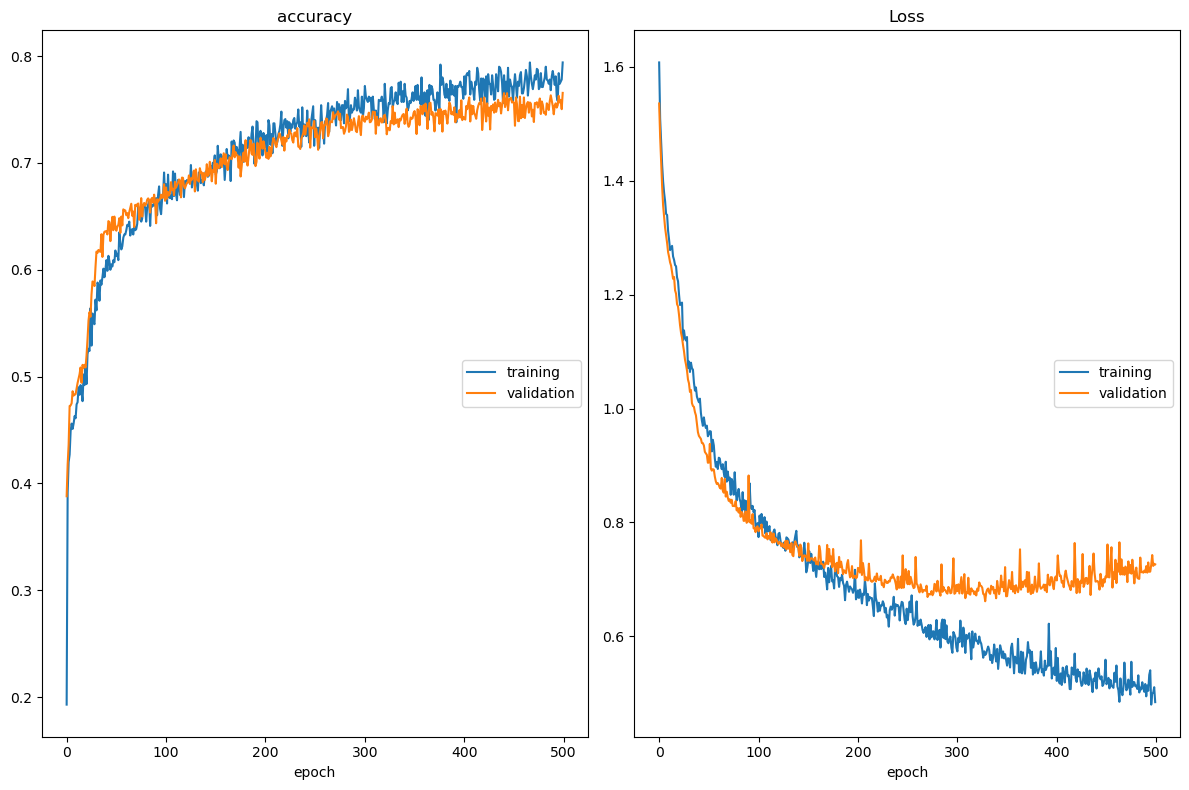

accuracy
	training         	 (min:    0.193, max:    0.794, cur:    0.794)
	validation       	 (min:    0.388, max:    0.766, cur:    0.766)
Loss
	training         	 (min:    0.480, max:    1.608, cur:    0.484)
	validation       	 (min:    0.661, max:    1.536, cur:    0.726)
32/32 [==============================] - 0s 14ms/step - loss: 0.4842 - accuracy: 0.7940 - val_loss: 0.7263 - val_accuracy: 0.7655


In [78]:
from livelossplot import PlotLossesKerasTF



model.fit(X_train,Y_train,epochs=500,validation_data=(X_test,Y_test),
            callbacks=[PlotLossesKerasTF()],verbose=1)


In [42]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0],1)
print(predictions[:5])

#predictions_dt = scaler_Y.inverse_transform(predictions)
#predictions_dt[:5]

32/32 [==============================] - 0s 909us/step


ValueError: cannot reshape array of size 5000 into shape (1000,1)

In [81]:
predictions_dt = scaler_Y.inverse_transform(predictions)
predictions_dt = np.round(predictions_dt)

pred_test = scaler_Y.inverse_transform(Y_test)



predictions_dt.flatten()

array([4., 0., 0., 0., 2., 4., 4., 4., 0., 1., 3., 2., 1., 5., 2., 1., 3.,
       3., 0., 0., 3., 0., 2., 3., 1., 3., 0., 0., 1., 0., 0., 0., 2., 1.,
       4., 2., 0., 0., 0., 0., 3., 0., 0., 3., 5., 0., 0., 0., 0., 4., 4.,
       0., 1., 2., 2., 0., 1., 3., 3., 4., 0., 1., 0., 0., 0., 3., 4., 2.,
       3., 4., 3., 3., 0., 3., 2., 3., 1., 4., 1., 0., 2., 0., 0., 0., 2.,
       3., 0., 2., 0., 0., 2., 0., 3., 1., 1., 4., 3., 1., 2., 4., 4., 3.,
       3., 2., 0., 0., 3., 0., 2., 1., 0., 0., 2., 0., 2., 0., 2., 2., 0.,
       4., 3., 2., 5., 2., 0., 4., 2., 3., 0., 3., 0., 1., 0., 0., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 2., 1., 0., 4., 3., 3., 0., 1., 2., 0.,
       0., 3., 0., 3., 0., 0., 2., 3., 3., 0., 0., 0., 0., 0., 2., 2., 0.,
       0., 2., 1., 1., 0., 0., 0., 0., 2., 2., 0., 0., 3., 0., 4., 2., 0.,
       1., 0., 0., 4., 1., 3., 1., 2., 0., 3., 0., 3., 0., 4., 1., 2., 0.,
       2., 4., 3., 3., 3., 2., 3., 1., 0., 2., 4., 2., 0., 3., 1., 3., 3.,
       0., 0., 3., 2., 0.

In [91]:
from sklearn.metrics import accuracy_score
pred_test = Y_test['incidents'].to_numpy()

print(predictions_dt[:10])
accuracy_score(Y_test, predictions_dt)

[[4.]
 [0.]
 [0.]
 [0.]
 [2.]
 [4.]
 [4.]
 [4.]
 [0.]
 [1.]]


ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [104]:
#replace_map = {'incidents' : {'None': 0, 'Low': 1, 'Medium': 2, 'High': 3, 'Very_High':4}}

outcome = []
for i in range(len(predictions_dt)):
    if predictions_dt[i] == 0:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'None'})
    elif predictions_dt[i] == 1:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Low'})
    elif predictions_dt[i] == 2:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Medium'})
    elif predictions_dt[i] == 3:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'High'})
    elif predictions_dt[i] == 4:
        outcome.append({'RowId' : i+1 , 'Incidents' : 'Very_High'})
    
print(outcome)
od = pd.DataFrame(outcome)
od.to_csv("out_file.csv", index=False,header=True)

[{'RowId': 2, 'Incidents': 'None'}, {'RowId': 3, 'Incidents': 'None'}, {'RowId': 4, 'Incidents': 'None'}, {'RowId': 9, 'Incidents': 'None'}, {'RowId': 19, 'Incidents': 'None'}, {'RowId': 20, 'Incidents': 'None'}, {'RowId': 22, 'Incidents': 'None'}, {'RowId': 25, 'Incidents': 'None'}, {'RowId': 27, 'Incidents': 'None'}, {'RowId': 28, 'Incidents': 'None'}, {'RowId': 29, 'Incidents': 'None'}, {'RowId': 30, 'Incidents': 'None'}, {'RowId': 31, 'Incidents': 'None'}, {'RowId': 32, 'Incidents': 'None'}, {'RowId': 37, 'Incidents': 'None'}, {'RowId': 38, 'Incidents': 'None'}, {'RowId': 39, 'Incidents': 'None'}, {'RowId': 40, 'Incidents': 'None'}, {'RowId': 42, 'Incidents': 'None'}, {'RowId': 43, 'Incidents': 'None'}, {'RowId': 46, 'Incidents': 'None'}, {'RowId': 47, 'Incidents': 'None'}, {'RowId': 48, 'Incidents': 'None'}, {'RowId': 49, 'Incidents': 'None'}, {'RowId': 52, 'Incidents': 'None'}, {'RowId': 53, 'Incidents': 'None'}, {'RowId': 56, 'Incidents': 'None'}, {'RowId': 61, 'Incidents': 'Non